In [1]:
import cv2
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D 
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.svm import SVC

In [2]:
from tensorflow.keras.datasets import mnist
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Check shapes to understand the dataset
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


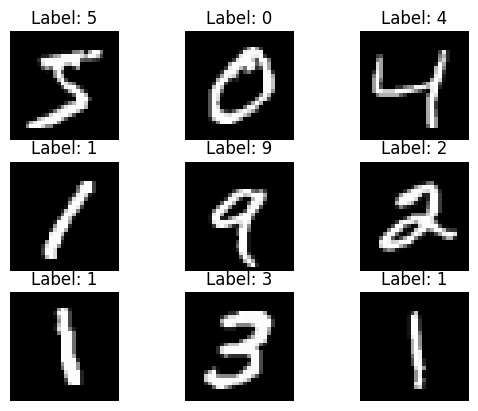

In [4]:
# Display the first few images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


Data Overview
Training data mean pixel intensity: 33.318421449829934
Training data standard deviation: 78.56748998339798


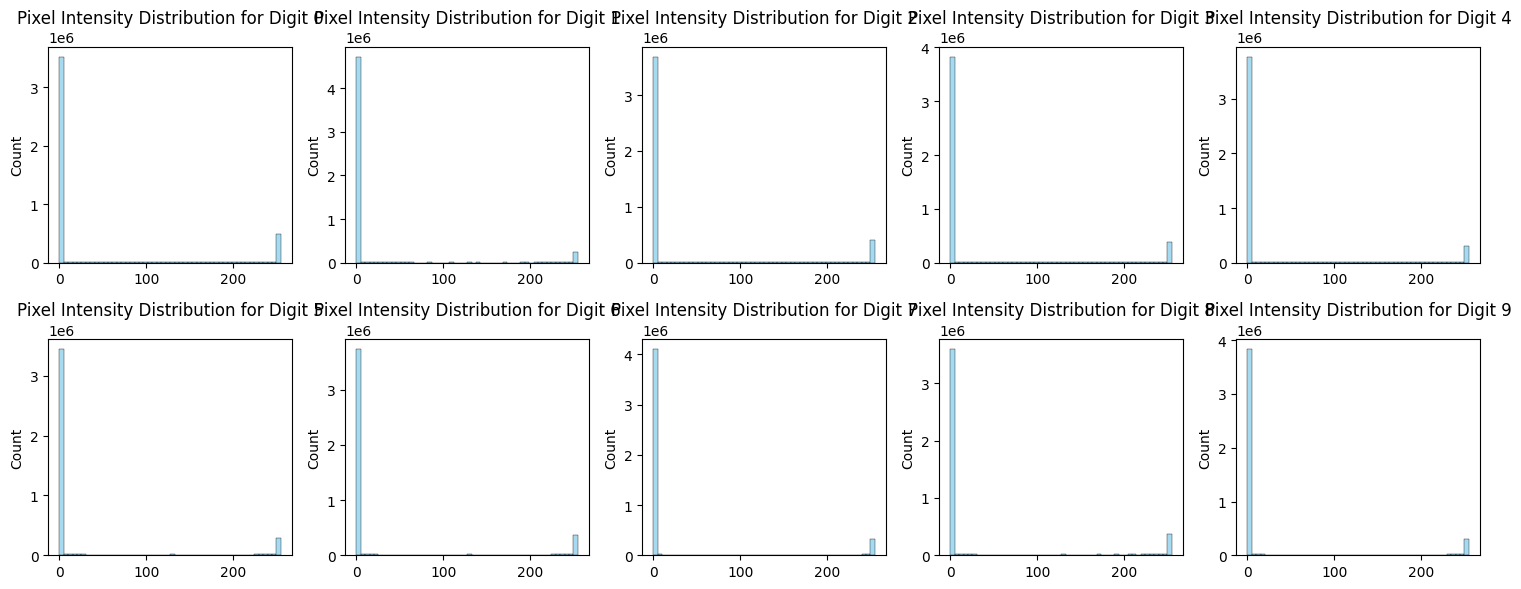

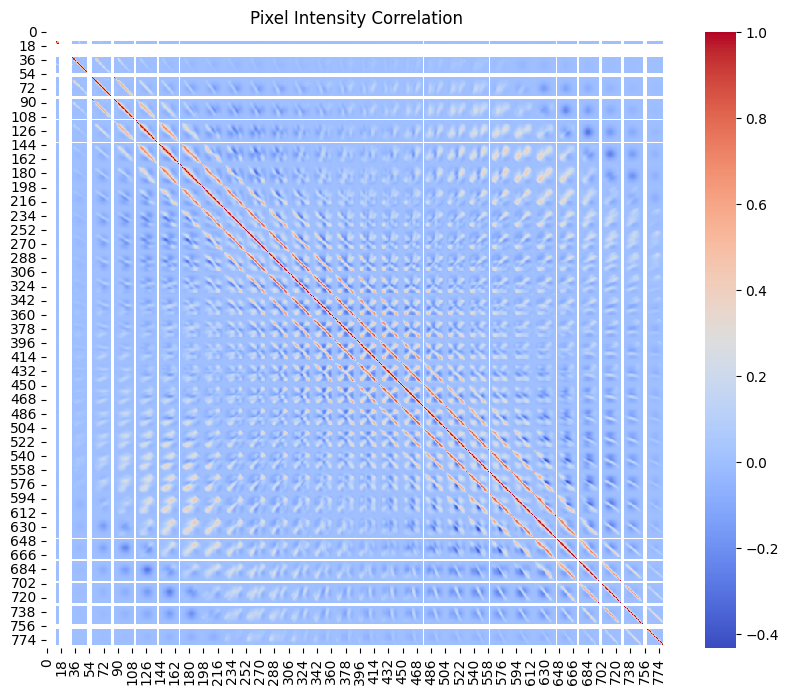

In [5]:
# Display more detailed information about the dataset
print("\nData Overview")
print("Training data mean pixel intensity:", np.mean(x_train))
print("Training data standard deviation:", np.std(x_train))

# Pixel intensity distribution for a few classes
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    ax = axes[i // 5, i % 5]
    sns.histplot(x_train[y_train == i].ravel(), bins=50, ax=ax, color="skyblue")
    ax.set_title(f"Pixel Intensity Distribution for Digit {i}")
plt.tight_layout()
plt.show()

# Display correlation among pixels by reshaping to flat vectors
x_train_flat = x_train.reshape(x_train.shape[0], -1)
correlations = pd.DataFrame(x_train_flat).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap="coolwarm")
plt.title("Pixel Intensity Correlation")
plt.show()


In [6]:


unique, counts = np.unique(y_train, return_counts=True)
print("Label distribution in training data:", dict(zip(unique, counts)))

Label distribution in training data: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
# Simple Neural Network Model
def build_nn_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
# CNN Model
def build_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
# Train and evaluate the models
nn_model = build_nn_model()
nn_model.fit(x_train, y_train, epochs=5)
nn_model.evaluate(x_test, y_test)



c:\Users\nomka\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8787 - loss: 0.4302
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9640 - loss: 0.1213
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9763 - loss: 0.0783
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9821 - loss: 0.0582
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9868 - loss: 0.0429
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9708 - loss: 0.0920


[0.07854652404785156, 0.9751999974250793]

In [11]:
cnn_model = build_cnn_model()
cnn_model.fit(x_train[..., np.newaxis], y_train, epochs=5)
cnn_model.evaluate(x_test[..., np.newaxis], y_test)

c:\Users\nomka\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8958 - loss: 0.3538
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9808 - loss: 0.0631
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9877 - loss: 0.0400
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9921 - loss: 0.0255
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9944 - loss: 0.0182
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9825 - loss: 0.0545


[0.04481320455670357, 0.9858999848365784]


Evaluating Neural Network Model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.96      0.96       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.98      0.98     10000



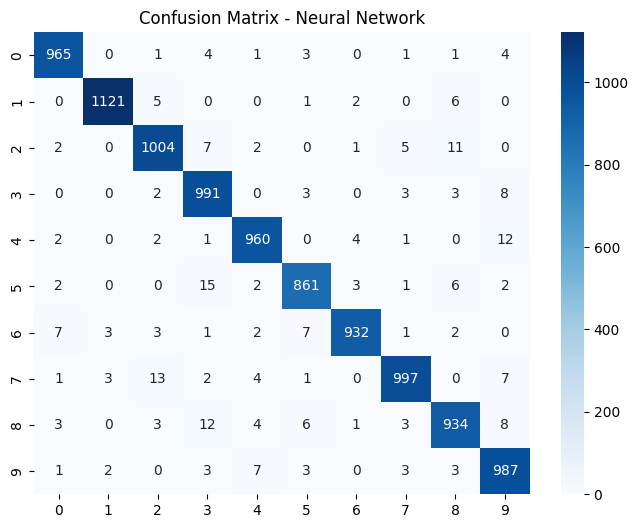

In [12]:

# Neural Network Model Evaluation
print("\nEvaluating Neural Network Model...")
nn_predictions = nn_model.predict(x_test).argmax(axis=1)
print("Classification Report for Neural Network:")
print(classification_report(y_test, nn_predictions))
cm_nn = confusion_matrix(y_test, nn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Neural Network")
plt.show()





Evaluating CNN Model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report for CNN:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



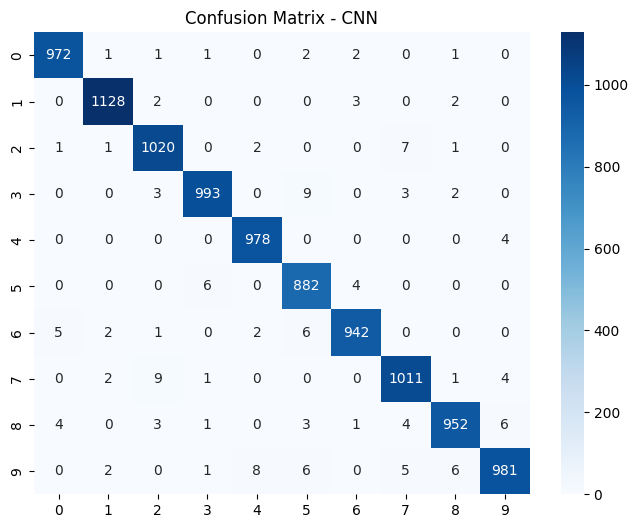

In [13]:
# CNN Model Evaluation
print("\nEvaluating CNN Model...")
cnn_predictions = cnn_model.predict(x_test[..., np.newaxis]).argmax(axis=1)
print("Classification Report for CNN:")
print(classification_report(y_test, cnn_predictions))
cm_cnn = confusion_matrix(y_test, cnn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - CNN")
plt.show()

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9895 - loss: 0.0339 - val_accuracy: 0.9757 - val_loss: 0.0780
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9916 - loss: 0.0269 - val_accuracy: 0.9734 - val_loss: 0.0889
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9947 - loss: 0.0195 - val_accuracy: 0.9797 - val_loss: 0.0752
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9948 - loss: 0.0173 - val_accuracy: 0.9774 - val_loss: 0.0888
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9956 - loss: 0.0157 - val_accuracy: 0.9802 - val_loss: 0.0749
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9962 - loss: 0.0129 - val_accuracy: 0.9843 - val_loss: 0.0528
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9973 - loss: 0.0085 - val_accuracy: 0.9854 - val_loss: 0.0516
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9975 - loss: 0.0082 - v

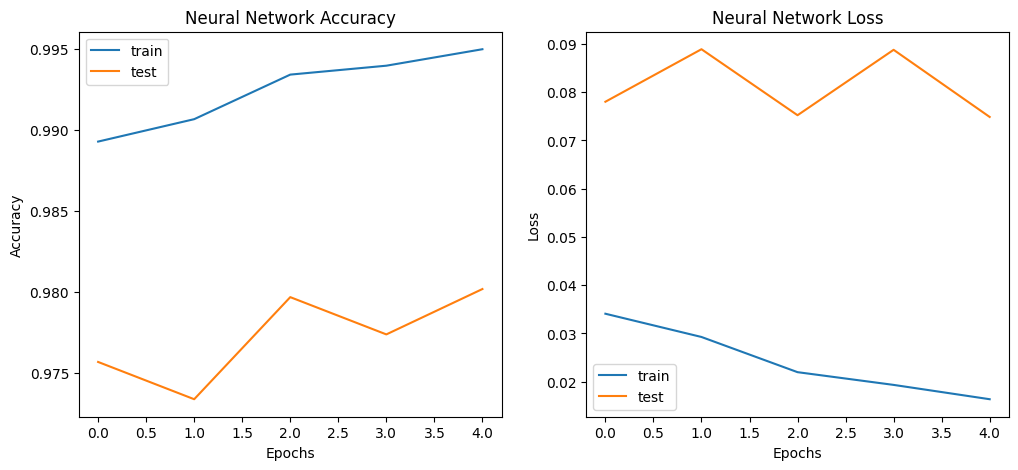

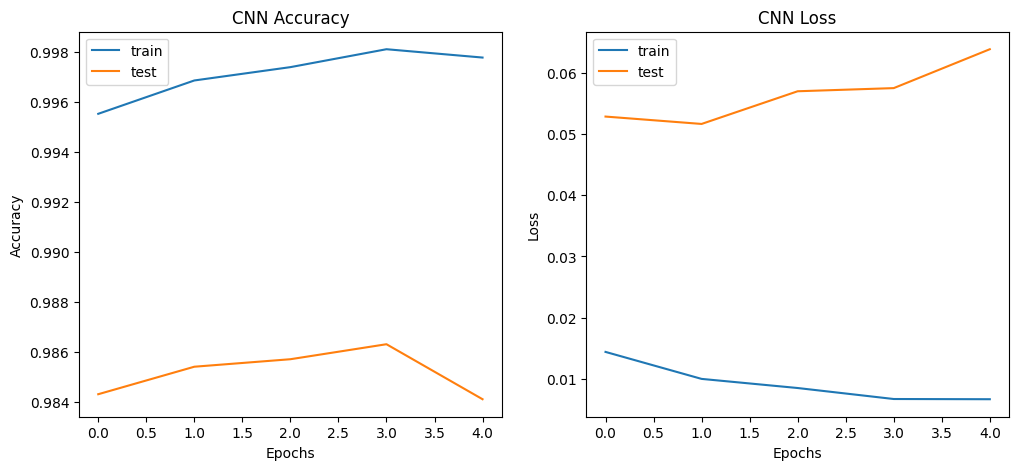

In [14]:
# Train Neural Network with history tracking
history_nn = nn_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=1)

# Train CNN with history tracking
history_cnn = cnn_model.fit(x_train[..., np.newaxis], y_train, epochs=5, validation_data=(x_test[..., np.newaxis], y_test), verbose=1)

# Plot accuracy and loss for both models
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title(f"{model_name} Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title(f"{model_name} Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

plot_history(history_nn, "Neural Network")
plot_history(history_cnn, "CNN")


SVM Accuracy: 0.9404


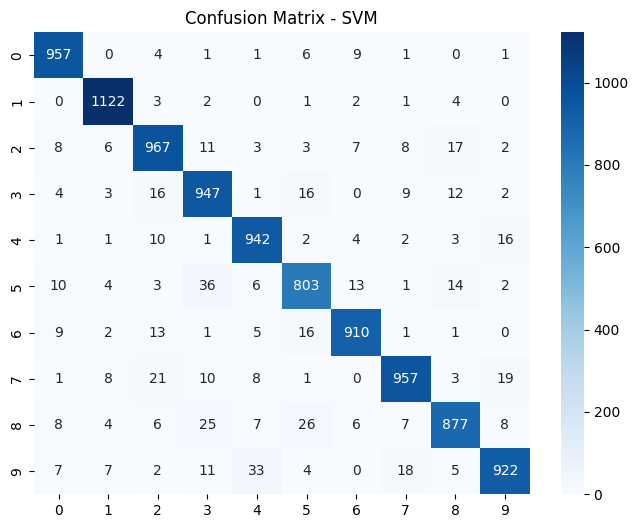

In [15]:
# Flatten images for SVM as it doesn’t support 3D images directly
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Train an SVM classifier
svm = SVC(kernel="linear")
svm.fit(x_train_flat, y_train)

# Evaluate SVM model
svm_predictions = svm.predict(x_test_flat)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

# Display the confusion matrix
cm_svm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - SVM")
plt.show()


Training size: 1000, Test Accuracy: 0.9083
Training size: 5000, Test Accuracy: 0.9513
Training size: 10000, Test Accuracy: 0.9594
Training size: 30000, Test Accuracy: 0.9742
Training size: 60000, Test Accuracy: 0.9792


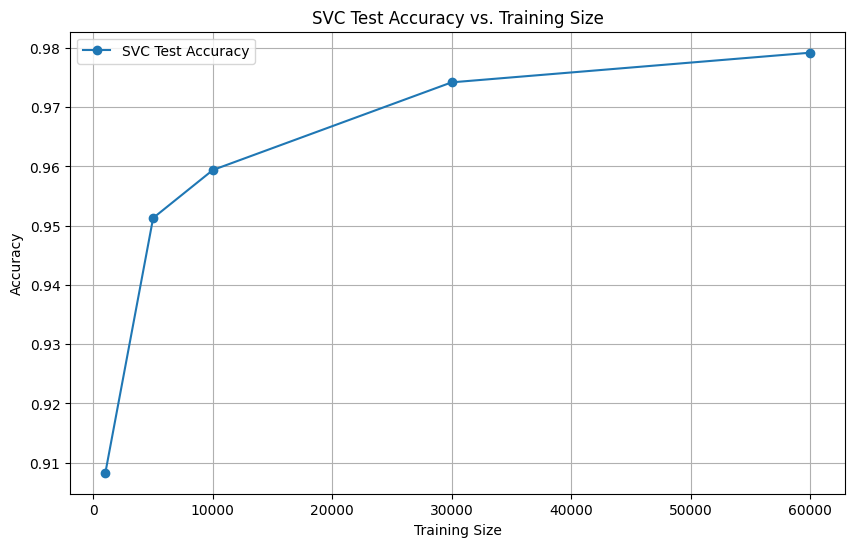

In [16]:
# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_flat = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flat = x_test.reshape(x_test.shape[0], -1) / 255.0

# Simulate "epochs" by increasing training size
train_sizes = [1000, 5000, 10000, 30000, len(x_train_flat)]
test_accuracies = []

for size in train_sizes:
    # Train SVC on progressively larger datasets
    svc = SVC(kernel='rbf', random_state=42)
    svc.fit(x_train_flat[:size], y_train[:size])
    predictions = svc.predict(x_test_flat)
    acc = accuracy_score(y_test, predictions)
    test_accuracies.append(acc)
    print(f"Training size: {size}, Test Accuracy: {acc:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, test_accuracies, marker='o', label="SVC Test Accuracy")
plt.title("SVC Test Accuracy vs. Training Size")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()


<font size=6>Challenges Faced</font></br>
<div style="line-height: 2;">
<font size=5>1.Data Preprocessing:</font></br>
The dataset requires normalization (pixel values scaled between 0 and 1) before being used for training. This was necessary to ensure faster convergence during training and prevent the models from being biased toward certain ranges of pixel values.</br>

<font size=5>2.Model Overfitting:</font></br>
Initial models had overfitting issues where the training accuracy was high, but the test accuracy was low. This was addressed by using techniques like dropout in CNNs and adjusting regularization parameters.</font></br>

<font size=5>3.Model Complexity:</font></br>
CNN models can be computationally expensive, especially when the dataset is large. To address this, efficient architectures were used, and smaller batch sizes were experimented with.</br>

<font size=5>4SVM Performance:</font></br>
The SVM model struggled with high-dimensional data (images with pixel values flattened into vectors). Kernel selection and training size scaling were used to improve performance, as shown in the training size vs. accuracy plot.</br>

<font size=5>5.Model Selection:</font></br>
Each model had its strengths and weaknesses. The CNN performed well with image data, while SVM and NN also provided good results but with more limitations in terms of performance for large datasets.</br>

<font size=5>6.Data Augmentation:</font></br>
For some models, particularly CNNs, using data augmentation (rotations, scaling) could improve the performance by providing more varied data, which wasn’t initially implemented.</br>

<font size=5>7.Memory Limitations:</font></br>
Some models, especially CNNs, required more memory and computation power, leading to training time issues. We had to optimize training by using batch sizes that fit the system’s memory limits.</br>

<font size=5>8.Hyperparameter Tuning:</font></br>
Models like CNNs and SVMs had hyperparameters (like learning rate, number of filters, kernel type, etc.) that needed to be tuned for better performance. This was done by experimenting with different values and evaluating the results.</br>

<font size=5>9.Class Imbalance:</font></br>
The dataset is mostly balanced, but there were occasional slight imbalances in the number of examples for certain digits. Techniques such as class weighting were considered to address this, though it wasn’t a major challenge here.</br>

<font size=5>10.Evaluation Metrics:</font></br>
While accuracy was the primary metric, there was also a need to focus on other metrics like confusion matrices, precision, recall, and F1-score to better understand model performance on each class.</br>

</div>